In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tarjeta_datos_4.csv to tarjeta_datos_4.csv
User uploaded file "tarjeta_datos_4.csv" with length 596032 bytes


#Lineas de Trabajo


##Linea de Trabajo 1

Imports Basicos

In [ ]:
import matplotlib.pyplot as plt
import numpy
import itertools
import seaborn as sns

### Carga de Datos

In [ ]:
import pandas as pd
import io
df_h1 = pd.read_csv('tarjeta_datos_1.csv', sep=';')

Seleccion de los valores mas relevantes para el estudio

In [ ]:
h1 = df_h1[["casos_mes", "cantidad en 100Kg", "incicencia_media_mes"]]

In [ ]:
import plotly.express as px

fig = px.scatter_3d(h1, x='casos_mes', y='cantidad en 100Kg', z='incicencia_media_mes')
fig.show()

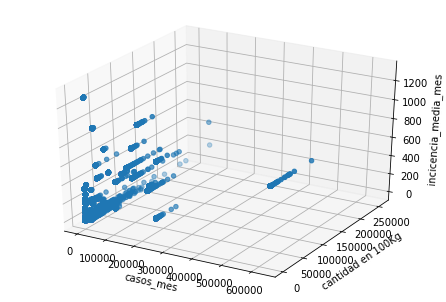

In [ ]:
# plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
x = h1['casos_mes']
y = h1['cantidad en 100Kg']
z = h1['incicencia_media_mes']

ax.set_xlabel('casos_mes')
ax.set_ylabel('cantidad en 100Kg')
ax.set_zlabel('incicencia_media_mes')

ax.scatter(x,y,z)
plt.show()
ax.view_init(30, 185)
plt.show()


#### Transformaciones previas

Normalizamos los datos, utilizando la operación MinMaxScaler, que  transformar a una escala dentro del rango [0, 1].

Esto puede generar cierta distorsión en los datos pero que puede ser conveniente para conseguir mejores resultados de clustering.

In [ ]:
from sklearn import preprocessing 

df_h1 = df_h1.dropna()

df_h1["fecha"] = pd.Categorical(df_h1["fecha"])
df_h1["pais"] = pd.Categorical(df_h1["pais"])
df_h1["flow"] = pd.Categorical(df_h1["flow"])
df_h1["producto"] = pd.Categorical(df_h1["producto"])
df_h1["fecha"] = df_h1["fecha"].cat.codes
df_h1["pais"] = df_h1["pais"].cat.codes
df_h1["flow"] = df_h1["flow"].cat.codes
df_h1["producto"] = df_h1["producto"].cat.codes

min_max_scaler = preprocessing.RobustScaler()
h1_norm = min_max_scaler.fit_transform(df_h1.select_dtypes(include=[np.number]))


### Clustering por K-means

#### Parametrización



Definicion de parámetros por defecto

In [ ]:
init = 'random' # initializacion 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence
tol = 1e-04 

 # random seed
random_state = 0

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(h1_norm)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(h1_norm, labels))

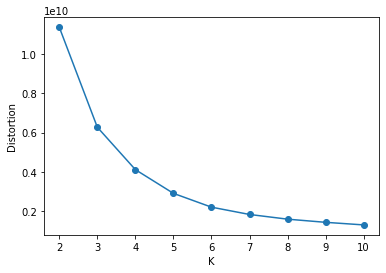

In [ ]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

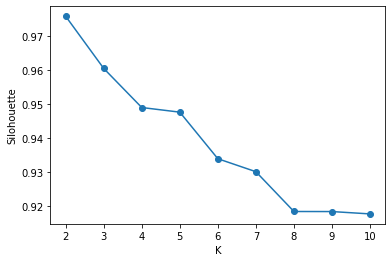

In [ ]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

#### Ejecución del Algoritmo

In [ ]:
k = 5

km = KMeans(k, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(h1_norm)


Calculo de los valores finales

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(h1_norm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.948
Distortion: 2901083469.57


Visualizacion los resultados


In [ ]:
km.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
fig = px.scatter_3d(df_h1, x='casos_mes', y='cantidad en 100Kg', 
                    z='incicencia_media_mes', color = km.labels_)
fig.show()

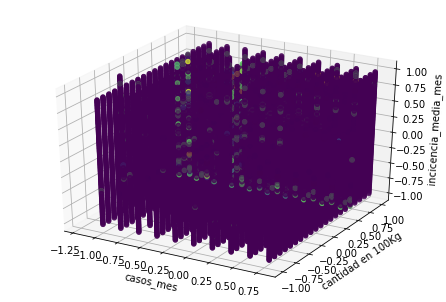

In [ ]:
#plotting orginal points with color related to label
fig = plt.figure()
ax = Axes3D(fig)
x = h1_norm[:,0]
y = h1_norm[:,1]
z = h1_norm[:,2]

ax.set_xlabel('casos_mes')
ax.set_ylabel('cantidad en 100Kg')
ax.set_zlabel('incicencia_media_mes')

ax.scatter(x,y,z, c= km.labels_)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c='red',s=50)

plt.show()
ax.view_init(30, 185)
plt.show()
      
      

Y a proceder a su interpretación

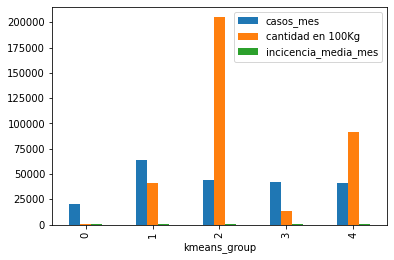

In [ ]:
h1['kmeans_group'] = km.labels_

res = h1[['casos_mes', 'cantidad en 100Kg', 'incicencia_media_mes', 'kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=True)

### Analisis de Resultados

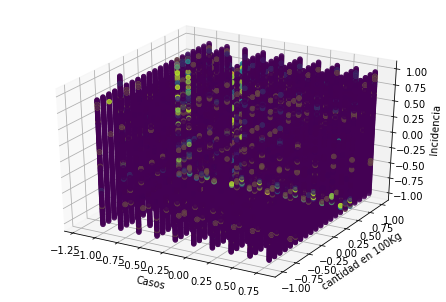

In [ ]:
#plotting orginal points with color related to label
fig = plt.figure()
ax = Axes3D(fig)
x = h1_norm[:,0]
y = h1_norm[:,1]
z = h1_norm[:,2]

ax.set_xlabel('Casos')
ax.set_ylabel('cantidad en 100Kg')
ax.set_zlabel('Incidencia')

ax.scatter(x,y,z, c= labels)

plt.show()
ax.view_init(30, 185)
plt.show()

Y procedemos a la interpretación de los resultados

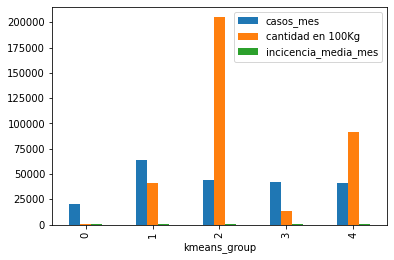

In [ ]:
df_h1['em_group'] = labels

df_h1[['casos_mes', 'cantidad en 100Kg', 'incicencia_media_mes', 'em_group']].groupby(('em_group')).mean()
res.plot(kind='bar', legend=True)

##Línea de trabajo 2


A continuación hablaremos de cómo crearemos el modelo para la segunda tarjeta de datos.

Primero cargamos los datos y como vemos, tenemos que modificar los tipos de algunas columnas, las cuales no se han podido recoger correctamente, con el fin de poder estudiar la correlación entre nuestras variables objetivo 'Valor_miles' y 'Dens_pob'.

In [ ]:
df = pd.read_csv('tarjeta_datos_2.csv', sep=';')
df = df.convert_dtypes()
df.dtypes

Producto          string
Fecha             string
Region            string
Precio_euro_Kg    string
Valor_miles       string
Volumen_miles     string
Dens_pob          string
dtype: object

In [ ]:
df['Valor_miles'] = df['Valor_miles'].str.replace(',', '.').astype(float)
df['Dens_pob'] = df['Dens_pob'].str.replace(',', '.').astype(float)
df['Volumen_miles'] = df['Volumen_miles'].str.replace(',', '.').astype(float)
df['Precio_euro_Kg'] = df['Precio_euro_Kg'].str.replace(',', '.').astype(float)
df.dtypes

Producto           string
Fecha              string
Region             string
Precio_euro_Kg    float64
Valor_miles       float64
Volumen_miles     float64
Dens_pob          float64
dtype: object

Comprobamos el nivel de correlación entre las columnas de 'Valor_miles' y 'Dens_pob', las cuales queremos usar para demostrar nuestra hipótesis ("Las zonas con mayor número de población tienen un mayor número de ventas de productos agrícolas").

In [ ]:
corr_lvl = df[['Valor_miles','Dens_pob']].corr()

print(f'El nivel decorrelación lineal es: \n{corr_lvl}')

El nivel decorrelación lineal es: 
             Valor_miles  Dens_pob
Valor_miles     1.000000  0.162154
Dens_pob        0.162154  1.000000


Como se puede ver, el nivel de correlación entre las dos variables es cercano a 0, por lo que no podemos usar una regresión lineal como se había planteado inicialmente. Por lo tanto, decidimos usar un caso de regresión no lineal, en este caso, árboles de decisión, que al usar una variable dependiente como es 'Valor_miles', podemos usarlo como un problema de regresión.

Lo primero que hacemos es cargar los subconjuntos de entrenamiento y de testing obtenidos de BigML al separarlos (80/20) de forma aleatoria.

Una de las tareas que hacemos es modificar la columna producto transformandola a valores numericos con ayuda de un diccionario para poder incluirla dentro del modelo y crear un modelo que tenga una base más sólida.

In [ ]:
train_dataset = pd.read_csv('Training_tarjetadatos2.csv', sep=',', decimal='.')
test_dataset = pd.read_csv('Test_tarjetadatos2.csv', sep=',', decimal='.')

In [ ]:
mapping = {
        'TOMATES': '1',
        'CEBOLLAS': '2',
        'AJOS': '3',
        'COLES': '4',
        'PEPINOS': '5',
        'JUDIAS VERDES': '6',
        'PIMIENTOS': '7',
        'CHAMPIÑONES+O.SETAS': '8',
        'LECHUGA/ESC./ENDIVIA': '9',
        'ESPARRAGOS': '10',
        'VERDURAS DE HOJA': '11',
        'BERENJENAS': '12',
        'ZANAHORIAS': '13',
        'CALABACINES': '14',
        'BROCOLI': '15',
        'ALCACHOFAS': '16',
        'APIO': '17',
        'COLIFLOR': '18',
        'PUERRO': '19',
        'NARANJAS': '20',
        'MANDARINAS': '21',
        'LIMONES': '22',
        'PLATANOS': '23',
        'MANZANAS': '24',
        'PERAS': '25',
        'MELOCOTONES': '26',
        'NECTARINAS': '27',
        'ALBARICOQUES': '28',
        'FRESAS/FRESON': '29',
        'MELON': '30',
        'SANDIA': '31',
        'CIRUELAS': '32',
        'CEREZAS': '33',
        'UVAS': '34',
        'KIWI': '35',
        'AGUACATE': '36',
        'PIÑA': '37',
        'POMELO': '38',
        'CHIRIMOYA': '39',
        'MANGO': '40',
        }

for index, value in train_dataset['Producto'].iteritems():
  train_dataset.loc[index, 'Producto'] = mapping[value]
train_dataset['Producto'] = train_dataset['Producto'].astype(int)

for index, value in test_dataset['Producto'].iteritems():
  test_dataset.loc[index, 'Producto'] = mapping[value]
test_dataset['Producto'] = test_dataset['Producto'].astype(int)

Creamos el modelo del árbol con ayuda de la librería sklearn y posteriormente dividimos los subconjuntos de datos para separar las variables dependientes y las independientes.

In [ ]:
# Creamos el modelo del arbol de decision regresor
modelo_arbol = DecisionTreeRegressor(criterion='squared_error' , max_depth=100, random_state=0)

# Separamos las variables de los sets de entrenamiento y de test
x_train = train_dataset[['Producto', 'Precio_euro_Kg', 'Volumen_miles', 'Dens_pob']]
y_train = train_dataset['Valor_miles']
x_test = test_dataset[['Producto', 'Precio_euro_Kg', 'Volumen_miles', 'Dens_pob']]
y_test = test_dataset['Valor_miles']

modelo_arbol.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=100, random_state=0)

###Resultados

En esta última parte empezamos a crear predicciones y calculamos los coeficientes de correlacion y del error cuadrático medio para evaluar el modelo.

In [ ]:
y_pred = modelo_arbol.predict(x_test)

# Calculamos el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calculamos el R2
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

MSE: 66060.21596694444
R2: 0.99387824866748


Mostramos a continuación el resultado para los siguientes valores de entrada al modelo.

In [ ]:
# Hacemos la predicción para la primera instancia del conjunto de datos de testeo
instancia = x_test.iloc[0, :]
print(f'Instancia de entrada:\n{instancia}')
prediccion = modelo_arbol.predict([instancia])
print(f'\nValor resultante para la entrada 1: {prediccion}\n')

# Hacemos la predicción para una segunda entrada, la cual son valores aleatorios metidos a mano
instancia2 = [1, 1.15, 2000, 100]
print(f'Valores de la instancia 2:\n{instancia2}')
prediccion = modelo_arbol.predict([instancia2])
print(f'\nValor resultante para la entrada 2: {prediccion}\n')

Instancia de entrada:
Producto            13.00
Precio_euro_Kg       0.78
Volumen_miles     2245.92
Dens_pob            95.71
Name: 0, dtype: float64

Valor resultante para la entrada 1: [1936.12]

Valores de la instancia 2:
[1, 1.15, 2000, 100]

Valor resultante para la entrada 2: [2241.39]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


A continuación se muestra el árbol de forma gráfica.

Por desgracia, como se puede apreciar, hay tantas ramas que no se puede llegar a ver el contenido de los nodos como tal. Pedimos disculpas por ello, ya que no hemos encontrado forma de mostrarlo correctamente en este Colab.

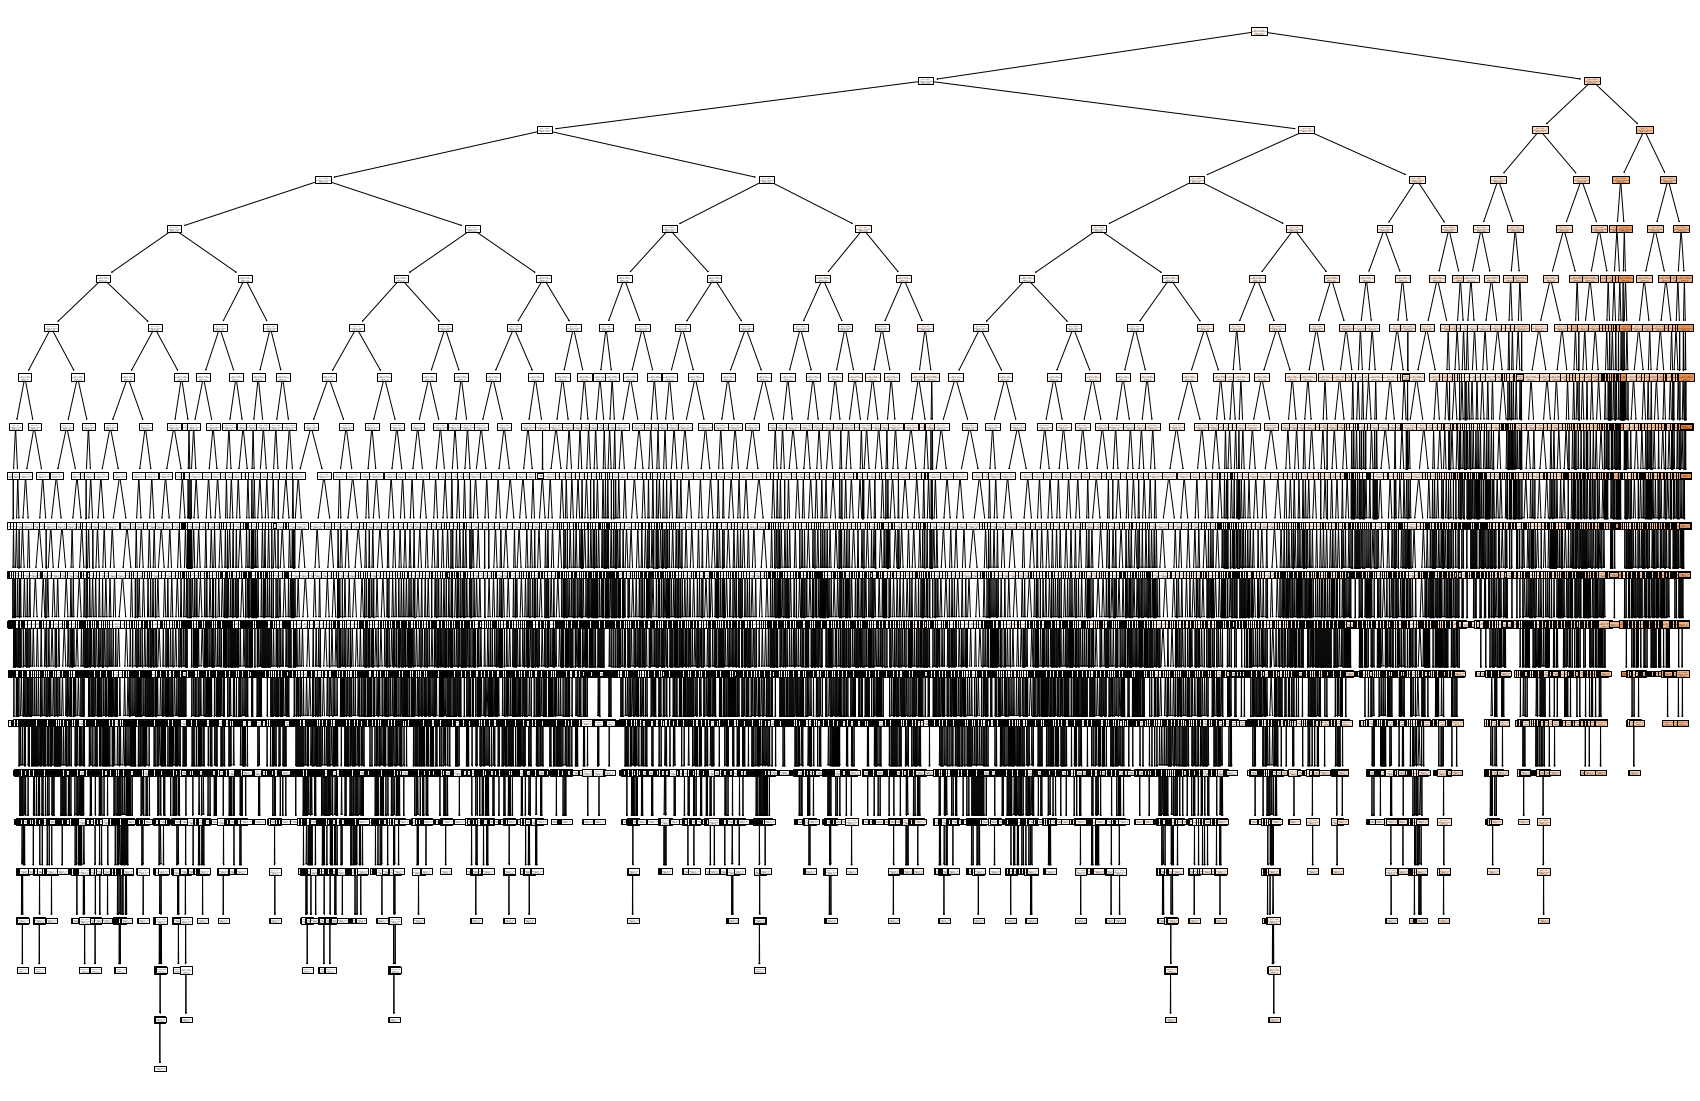

In [ ]:
# Mostramos el arbol resultante
plt.figure(figsize=(30,20))
plot_tree(modelo_arbol, filled=True)
plt.show()

## Línea de trabajo 3


Realizamos un diagrama de correlación y vemos que las características mantienen baja correlación entre ellas , lo que nos indica que no hay relación lineal.

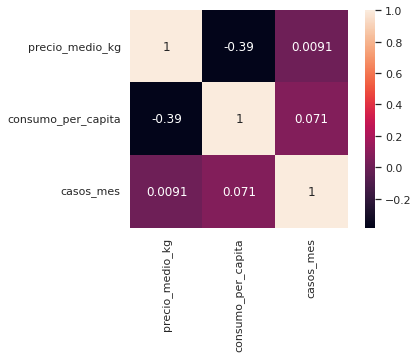

In [ ]:
# 0. load data in DataFrame
df = pd.read_csv("tarjeta_datos_3.csv", sep =";", index_col='fecha')

sns.set()
sns.heatmap(df.corr(), square=True, annot=True)

Seleccionamos las carecterísticas que vamos a utilizar, incluso la que vamos a predecir y dividimos los datos en el conjunto de entrenamiento y en el test. En este caso hemos ampliado el conjunto de datos de entrenamiento para poder trabajar con unos datos en los que influya la aparición del covid. Por eso, hemos escogido hasta agosto de 2020 como conjunto de entrenamiento.

In [ ]:
# 0.1 features and labels
df_f = df[['precio_medio_kg', 'consumo_per_capita','casos_mes']]
train = df_f.loc['1/2018':'8/2020']
test  = df_f.loc['9/2020' :]

test.head()

,precio_medio_kg,consumo_per_capita,casos_mes
fecha,,,
9/2020,1.77,1.46,306330.0
9/2020,1.23,0.67,306330.0
9/2020,2.73,0.36,306330.0
9/2020,2.16,0.62,306330.0
9/2020,3.78,0.15,306330.0


In [ ]:
# rest index avoid problems in cross validation
train.reset_index(drop = True, inplace = True)
train.head()

,precio_medio_kg,consumo_per_capita,casos_mes
0,0.78,2.38,0.0
1,1.69,0.88,0.0
2,1.01,0.57,0.0
3,4.17,0.06,0.0
4,1.08,0.15,0.0


VALIDACIÓN CRUZADA: Los datos se dividen en conjuntos de entrenamiento y de prueba varias veces consecutivamente y el valor medio de las puntuaciones de predicción obtenidas con los diferentes conjuntos es la estimación del enlace de error.

Utilizamos MAE como métrica de error

Min Value uniform : 0.7453006827956989 (12)
Min Value distance : 0.893887455394126 (12)


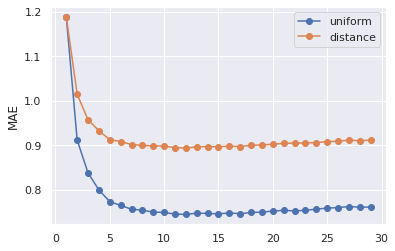

In [ ]:
cv = KFold(n_splits = 10, shuffle = False) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['precio_medio_kg'], axis=1), 
                               y = f_train['precio_medio_kg'])
          y_pred = knn.predict(X = f_test.drop(['precio_medio_kg'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['precio_medio_kg'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

Una vez identificada la mejor parametrización pasaremos a realizar una ejecución del modelo y graficaremos sus resultados.

In [ ]:
# constructor
n_neighbors = 12
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = train.drop(['precio_medio_kg'], axis=1), y = train['precio_medio_kg'])
y_pred = knn.predict(X = test.drop(['precio_medio_kg'], axis = 1))
mae = mean_absolute_error(test['precio_medio_kg'], y_pred)
print ('MAE', mae)

MAE 0.7049867724867724


Guardamos los resultados obtenidos en un nuevo archivo

In [ ]:
# round the result and cast to int
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'date': test.index,'product':df.loc['9/2020' :].producto, 'result': res})


with open('result_3.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Por último, intentamos visualizar cómo ha resultado nuestra predicción con la realidad.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


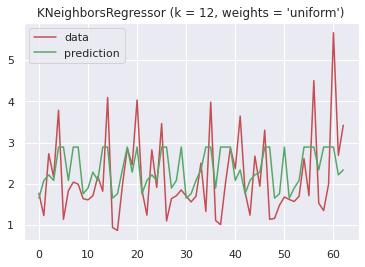

In [ ]:
# x axis for plotting
xx = np.stack(i for i in range(test['precio_medio_kg'].shape[0]))
plt.plot(xx, test['precio_medio_kg'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## Linea de trabajo 4

Esta línea de trabajo trata la hipótesis siguiente: 
* "El porcentaje de penetración de un alimento aumenta en los hogares según la fecha, la región, si el volumen del producto es mayor y su precio menor. "

Para ello hemos intentado descartar y comprobar diferentes algoritmos para buscar el idóneo para esta hipótesis, en colab hemos hecho dos de ellos: regresión lineal y random forest.
Además de estos dos hemos intentado tambíen redes neuronales pero de eso hablaremos en el informe porque lo hemos hecho usando BigML.

### Regresión lineal
Primero hemos intenado hacer el acercamiento más obvio a la par que sencillo, que es ver si se podía utilizar regresión lineal.
La regresión lineal es una técnica de análisis de datos que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido. Modela matemáticamente la variable desconocida o dependiente y la variable conocida o independiente como una ecuación lineal.


Para ello hemos cargado el dataframe de la tarjeta de datos 4.

In [ ]:
df_tj_4 = pd.read_csv("tarjeta_datos_4.csv", sep = ";")

In [ ]:
df_tj_4.head()

,año,mes,CCAA,producto,volumen_kg,precio_medio_kg,penetracion_%
0,2018,1,1,1,22409.72,0.77,82.96
1,2018,1,1,2,7480.28,1.47,79.01
2,2018,1,1,3,4717.41,0.92,72.88
3,2018,1,1,4,538.35,3.98,40.69
4,2018,1,1,5,1066.82,0.98,17.48


Para comprobar si podíamos usar algun algoritmo de regresión lineal hemos comprobado la correlación entre todas las columnas para cada alimento.

In [ ]:
# Aquí se hace un diccionario de los alimentos para recorrerlo y evaluar la correlación entre las variables para cada uno.
dict_alimentos = {
        'PATATAS': 1,
        'TOMATES': 2,
        'CEBOLLAS': 3,
        'AJOS': 4,
        'COLES': 5,
        'PEPINOS': 6,
        'JUDIAS VERDES': 7,
        'PIMIENTOS': 8,
        'CHAMPIÑONES+O.SETAS': 9,
        'LECHUGA/ESC./ENDIVIA': 10,
        'ESPARRAGOS': 11,
        'VERDURAS DE HOJA': 12,
        'BERENJENAS': 13,
        'ZANAHORIAS': 14,
        'CALABACINES': 15,
        'BROCOLI': 16,
        'ALCACHOFAS': 17,
        'NARANJAS': 18,
        'MANDARINAS': 19,
        'LIMONES': 20,
        'PLATANOS': 21,
        'MANZANAS': 22,
        'PERAS': 23,
        'MELOCOTONES': 24,
        'NECTARINAS': 25,
        'ALBARICOQUES': 26,
        'FRESAS/FRESON': 27,
        'MELON': 28,
        'SANDIA': 29,
        'CIRUELAS': 30,
        'CEREZAS': 31,
        'UVAS': 32,
        'KIWI': 33,
        'AGUACATE': 34,
        'PIÑA': 35,
        'POMELO': 36,
        'CHIRIMOYA': 37,
        'APIO': 38,
        'COLIFLOR': 39,
        'PUERRO': 40,
        'MANGO': 41
        }

# Aquí se hace el bucle analizando la correlación de cada variable con el resto para cada alimento y printeando las que son mayores de 0.7
for alimento, id in dict_alimentos.items():
  good_correlation = False

  df_aux = df_tj_4[df_tj_4["producto"] == id]

  print(f"Evaluando producto '{alimento}':")

  # Si la correlacion entre estas dos columnas es mayor o igual de 0.7 o menor o igual de -0.7 entonces hay correlacion y se printeara.
  correlation = df_aux["penetracion_%"].corr(df_aux["año"])
  if correlation >= 0.7 or correlation <= -0.7:
    print(f"\tCorrelación entre penetracion_% y año: {correlation}")
    good_correlation = True

  correlation = df_aux["penetracion_%"].corr(df_aux["mes"])
  if correlation >= 0.7 or correlation <= -0.7:
    print(f"\tCorrelación entre penetracion_% y mes: {correlation}")
    good_correlation = True

  correlation = df_aux["penetracion_%"].corr(df_aux["CCAA"])
  if correlation >= 0.7 or correlation <= -0.7:
    print(f"\tCorrelación entre penetracion_% y CCAA: {correlation}")
    good_correlation = True

  correlation = df_aux["penetracion_%"].corr(df_aux["producto"])
  if correlation >= 0.7 or correlation <= -0.7:
    print(f"\tCorrelación entre penetracion_% y producto: {correlation}")
    good_correlation = True

  correlation = df_aux["penetracion_%"].corr(df_aux["volumen_kg"])
  if correlation >= 0.7 or correlation <= -0.7:
    print(f"\tCorrelación entre penetracion_% y volumen_kg: {correlation}")
    good_correlation = True

  correlation = df_aux["penetracion_%"].corr(df_aux["precio_medio_kg"])
  if correlation >= 0.7 or correlation <= -0.7:
    print(f"\tCorrelación entre penetracion_% y precio_medio_kg: {correlation}")
    good_correlation = True

  if good_correlation == False:
    print("\tNo existe correlación entre ninguna variable con respecto a penetración en %")
  print("\n")

Evaluando producto 'PATATAS':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'TOMATES':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'CEBOLLAS':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'AJOS':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'COLES':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'PEPINOS':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'JUDIAS VERDES':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'PIMIENTOS':
	No existe correlación entre ninguna variable con respecto a penetración en %


Evaluando producto 'CHAMPIÑONES+O.SETAS':
	No existe correlación entre ninguna variable con respecto a penetración e

El resultado es que ninguna tiene ninguna correlación excepto dos alimentos que tienen una correlación entre dos columnas, por lo que esto es puramente arbitrario y no nos serviría de nada hacer un algoritmo de regresión lineal, por lo tanto los descartamos.

### Random Forest Regressor
Random Forest es un conjunto de árboles de decisión combinados con bagging. Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor que un sólo árbol.
Hemos pensado en usar este algoritmo ya que al no tener correlación pensamos que podíamos intentar usar un algoritmo de regresion no lineal y este nos parecía bueno ya que funciona bien con múltiples datos y complejos, como creemos que es nuestro caso.

Primero importamos la tarjeta de datos.

In [ ]:
df_tj_4 = pd.read_csv("tarjeta_datos_4.csv", sep = ";")

In [ ]:
df_tj_4.head()

,año,mes,CCAA,producto,volumen_kg,precio_medio_kg,penetracion_%
0,2018,1,1,1,22409.72,0.77,82.96
1,2018,1,1,2,7480.28,1.47,79.01
2,2018,1,1,3,4717.41,0.92,72.88
3,2018,1,1,4,538.35,3.98,40.69
4,2018,1,1,5,1066.82,0.98,17.48


* En x_train introducimos las variables dependientes de la hipótesis del dataset de entrenamiento.
* En y_train introducimos la variable independiente de la hipótesis del dataset de entrenamiento.
* En x_test introducimos las variables dependientes de la hipótesis del dataset de testeo.
* En y_test introducimos la variable independiente de la hipótesis del dataset de testeo.

In [ ]:
X = df_tj_4[['año', 'mes', 'CCAA', 'producto', 'volumen_kg', 'precio_medio_kg']]
y = df_tj_4['penetracion_%']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train.head()

,año,mes,CCAA,producto,volumen_kg,precio_medio_kg
14868,2019,11,1,28,2036.49,1.09
10986,2019,5,15,34,76.48,3.09
3878,2018,7,7,3,1029.22,0.99
14912,2019,11,3,30,73.85,2.34
11673,2019,6,15,24,161.67,1.99


In [ ]:
x_test.head()

,año,mes,CCAA,producto,volumen_kg,precio_medio_kg
2431,2018,4,13,33,1784.81,2.84
10292,2019,4,15,37,0.00,0.00
2946,2018,5,8,19,825.50,1.49
6992,2018,12,5,6,235.61,1.54
3349,2018,6,13,1,12411.91,0.86


Ahora vamos a entrenar el modelo de Random forest con los set de entrenamiento que acabamos de crear con 100 árboles.

In [ ]:
# Creamos un modelo random forest con 100 arboles de decision y un random state de 0.
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Ahora entrenamos el modelo con el set de entrenamiento
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

Ahora hacemos la predicción con las variables dependientes de testeo y evaluamos la respuesta.

In [ ]:
# Realizamos la prediccion
y_pred = rf_model.predict(x_test)

# Calculamos el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calculamos el R2
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')


MSE: 26.95703205653646
R2: 0.9540749256397102


La respuesta, como podemos ver, es muy buena. Tiene metricas muy bajas y un coeficiente de determinación muy alto.

Aquí podemos ver el porcentaje de importancia de cada columna en la predicción final.

In [ ]:
pd.DataFrame({'Attributes': ('año', 'mes', 'CCAA', 'producto', 'volumen_kg', 'precio_medio_kg'), 'Decision Tree': rf_model.feature_importances_})

,Attributes,Decision Tree
0,año,0.005078
1,mes,0.028081
2,CCAA,0.040827
3,producto,0.288954
4,volumen_kg,0.593103
5,precio_medio_kg,0.043957


Aquí hacemos una predicción para la primera instancia del conjunto de datos de testeo para ver en cuanto se equivoca. El dato correcto sería 38.61

In [ ]:
# Hacemos la predicción para la primera instancia del conjunto de datos de testeo
instancia = x_test.iloc[0, :]
print(f'Instancia de entrada:\n{instancia}')
prediccion = rf_model.predict([instancia])
print(f'\nValor resultante para la entrada 1: {prediccion}\n')

# Hacemos la predicción para una segunda entrada, la cual son valores aleatorios metidos a mano
instancia2 = [2024, 2, 1, 27, 250, 2]
print(f'Valores de la instancia 2:\n{instancia2}')
prediccion = rf_model.predict([instancia2])
print(f'\nValor resultante para la entrada 2: {prediccion}\n')

Instancia de entrada:
año                2018.00
mes                   4.00
CCAA                 13.00
producto             33.00
volumen_kg         1784.81
precio_medio_kg       2.84
Name: 2431, dtype: float64

Valor resultante para la entrada 1: [39.4677]

Valores de la instancia 2:
[2024, 2, 1, 27, 250, 2]

Valor resultante para la entrada 2: [13.0565]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


El dato resultado acaba siendo 39.4677, con lo que se puede ver que el modelo funciona adecuadamente.

Ahora vamos a mostrar los resultados.
Para poder hacer zoom sobre los graficos y asi poder verlos mejor instalamos la libreria mpld3.

In [ ]:
%%capture
!pip install mpld3

import mpld3
from mpld3 import plugins

Aquí creamos el gráfico en el que los puntos rojos son los datos reales y las lineas verdes sería las predicciones.

In [ ]:
# Crea el gráfico
xx = np.stack(i for i in range(len(y_test)))
fig, ax = plt.subplots()
ax.scatter(xx, y_test, c='r', label='data')
ax.plot(xx, y_pred, c='g', label='prediction')
ax.axis('tight')
ax.set_title("RandomForests Regressor")

# Habilita el zoom
zoom = plugins.Zoom(enabled=True)
mpld3.plugins.connect(fig, zoom)

# Muestra el gráfico
mpld3.display()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


Como podemos comprobar los puntos rojos están cercanos a las líneas verdes y nos vuelve a demostrar que este modelo es adecuado.

Aquí se exporta el gráfico de arriba para usar en el documento.

In [ ]:
ax.figure.savefig('grafico_random_forest_regressor.png')